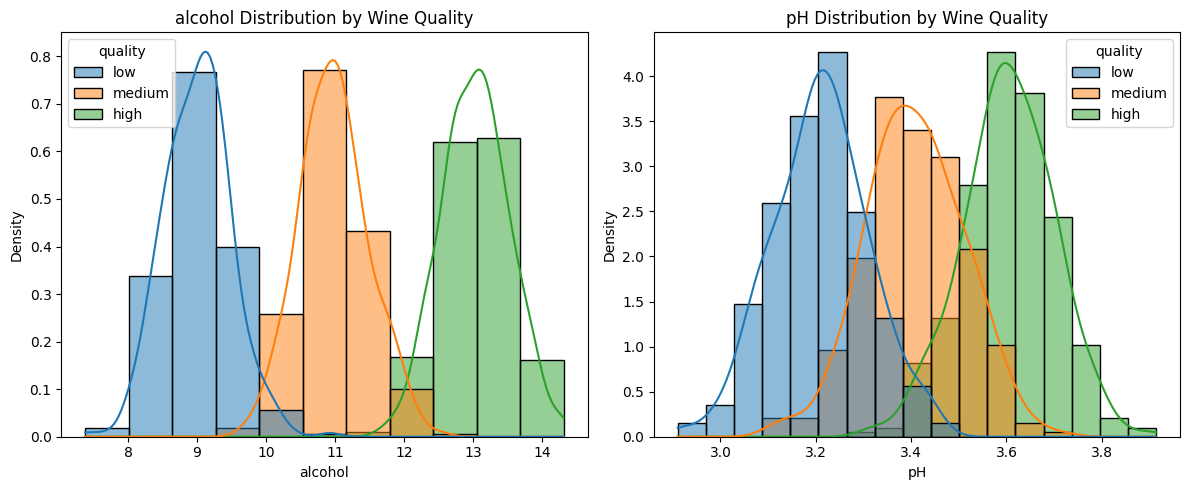

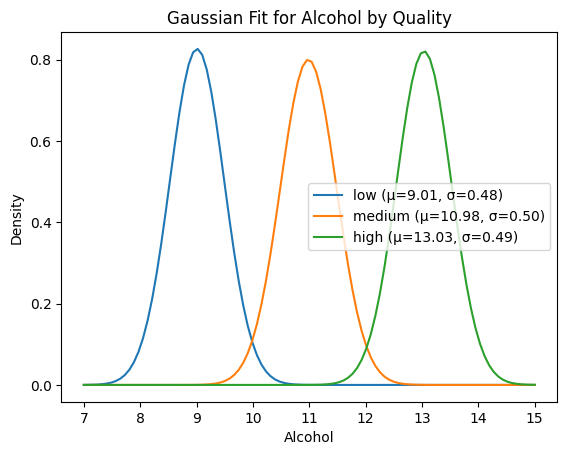

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic wine data
n_samples = 1000

# Gaussian distributed features for 3 quality groups
qualities = ['low', 'medium', 'high']

data = {
    'alcohol': np.concatenate([
        np.random.normal(9, 0.5, n_samples // 3),
        np.random.normal(11, 0.5, n_samples // 3),
        np.random.normal(13, 0.5, n_samples // 3)
    ]),
    'pH': np.concatenate([
        np.random.normal(3.2, 0.1, n_samples // 3),
        np.random.normal(3.4, 0.1, n_samples // 3),
        np.random.normal(3.6, 0.1, n_samples // 3)
    ]),
    'quality': np.repeat(qualities, n_samples // 3)
}

df = pd.DataFrame(data)

# Step 2: Visualize distributions
plt.figure(figsize=(12, 5))
for i, feature in enumerate(['alcohol', 'pH']):
    plt.subplot(1, 2, i+1)
    sns.histplot(data=df, x=feature, hue='quality', kde=True, stat='density', common_norm=False)
    plt.title(f'{feature} Distribution by Wine Quality')
plt.tight_layout()
plt.show()

# Step 3: Fit Gaussian and plot PDF for one feature
feature = 'alcohol'
for q in qualities:
    mu, std = norm.fit(df[df['quality'] == q][feature])
    x = np.linspace(7, 15, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, label=f'{q} (μ={mu:.2f}, σ={std:.2f})')

plt.title('Gaussian Fit for Alcohol by Quality')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.legend()
plt.show()
